# K-Means Clustering with Silhouette Analysis
In this tutorial, we apply K-Means clustering to a dataset and evaluate the clustering quality using silhouette analysis.

## Step 1: Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler

## Step 2: Generate Synthetic Dataset
We create a 2D dataset with clear cluster structure using `make_blobs`.

In [2]:
X, y = make_blobs(n_samples=500, centers=4, cluster_std=0.6, random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

df = pd.DataFrame(X_scaled, columns=['Feature 1', 'Feature 2'])
df['True Cluster'] = y
df.head()

,Feature 1,Feature 2,True Cluster
0,-0.912517,0.643262,3
1,-0.979484,-1.565351,2
2,1.793512,-0.222230,1
3,0.124474,0.840642,0
4,-0.530697,-1.599288,2


## Step 3: Visualize the Original Data (With True Labels)

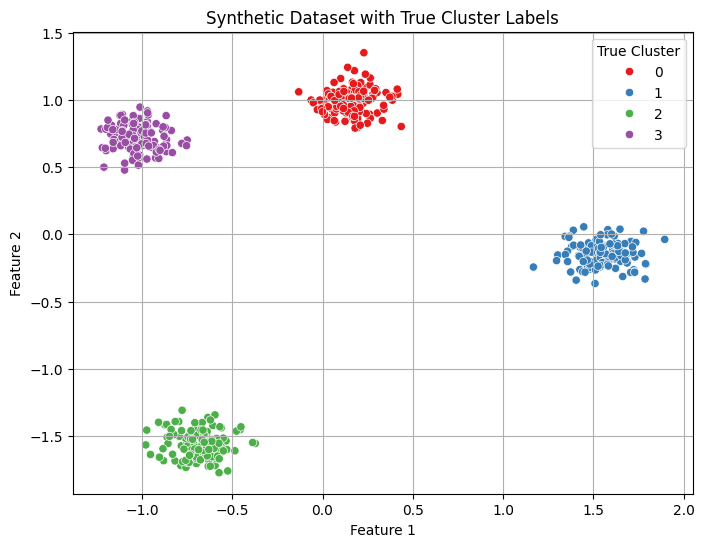

In [3]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Feature 1', y='Feature 2', hue='True Cluster', palette='Set1', legend='full')
plt.title("Synthetic Dataset with True Cluster Labels")
plt.grid(True)
plt.show()

## Step 4: Apply K-Means Clustering (k=4)

In [4]:
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)
df['KMeans Cluster'] = cluster_labels

## Step 5: Visualize the K-Means Clusters

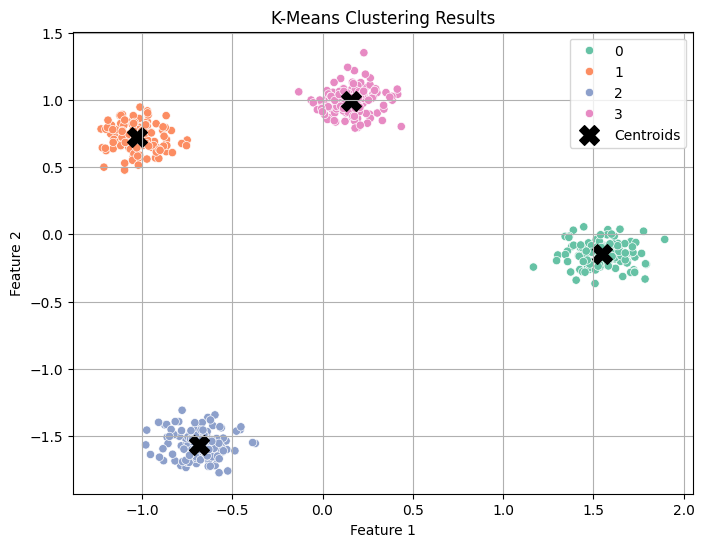

In [5]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Feature 1', y='Feature 2', hue='KMeans Cluster', palette='Set2', legend='full')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.title("K-Means Clustering Results")
plt.legend()
plt.grid(True)
plt.show()

## Step 6: Silhouette Score and Silhouette Plot

In [6]:
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)
print(f"Average Silhouette Score for k=4: {silhouette_avg:.3f}")

Average Silhouette Score for k=4: 0.880


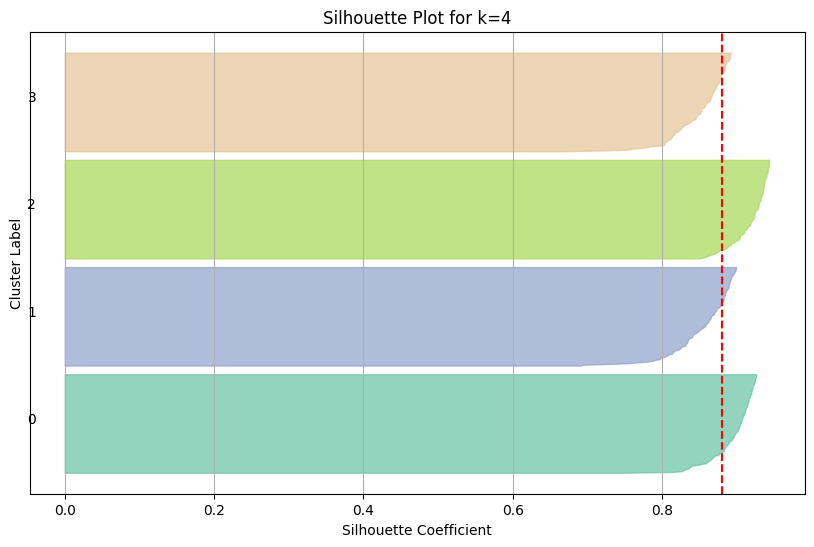

In [7]:
# Silhouette Plot
fig, ax = plt.subplots(figsize=(10, 6))
y_lower = 10
for i in range(4):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = plt.cm.Set2(i / 4)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax.set_title("Silhouette Plot for k=4")
ax.set_xlabel("Silhouette Coefficient")
ax.set_ylabel("Cluster Label")
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])
plt.grid(True)
plt.show()